In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

pal = sns.color_palette("colorblind")

In [3]:
df = pd.read_csv("data_collection/results.csv", index_col="Category").fillna(0)
df

,Sampled repos,Success,Build failed,No tests found,Run failed,Import-related error
Category,,,,,,
Julia,131,1,130,0,0,0
R,77,1,2,1,73,34
ImportError,93,1,7,0,85,77
Installation failed,172,4,81,2,85,70
Success without dependencies,94,10,3,0,81,70
Success with dependencies,113,51,38,1,23,5
Success with /requirements.txt,88,51,24,1,12,1
Success with /Pipfile,40,5,23,1,11,2
Binder Event Archive,19,6,2,3,8,2


## Validate totals:

In [4]:
for name, row in df.iterrows():
    total = row["Sampled repos"]
    categories = ["Success", "Build failed", "No tests found", "Run failed"]
    cs = 0
    for cat in categories:
        cs += row[cat]
    if cs != total:
        print(f"Error! {name} sampled {total} repos, sum of all categories = {cs}")


Plot totals:

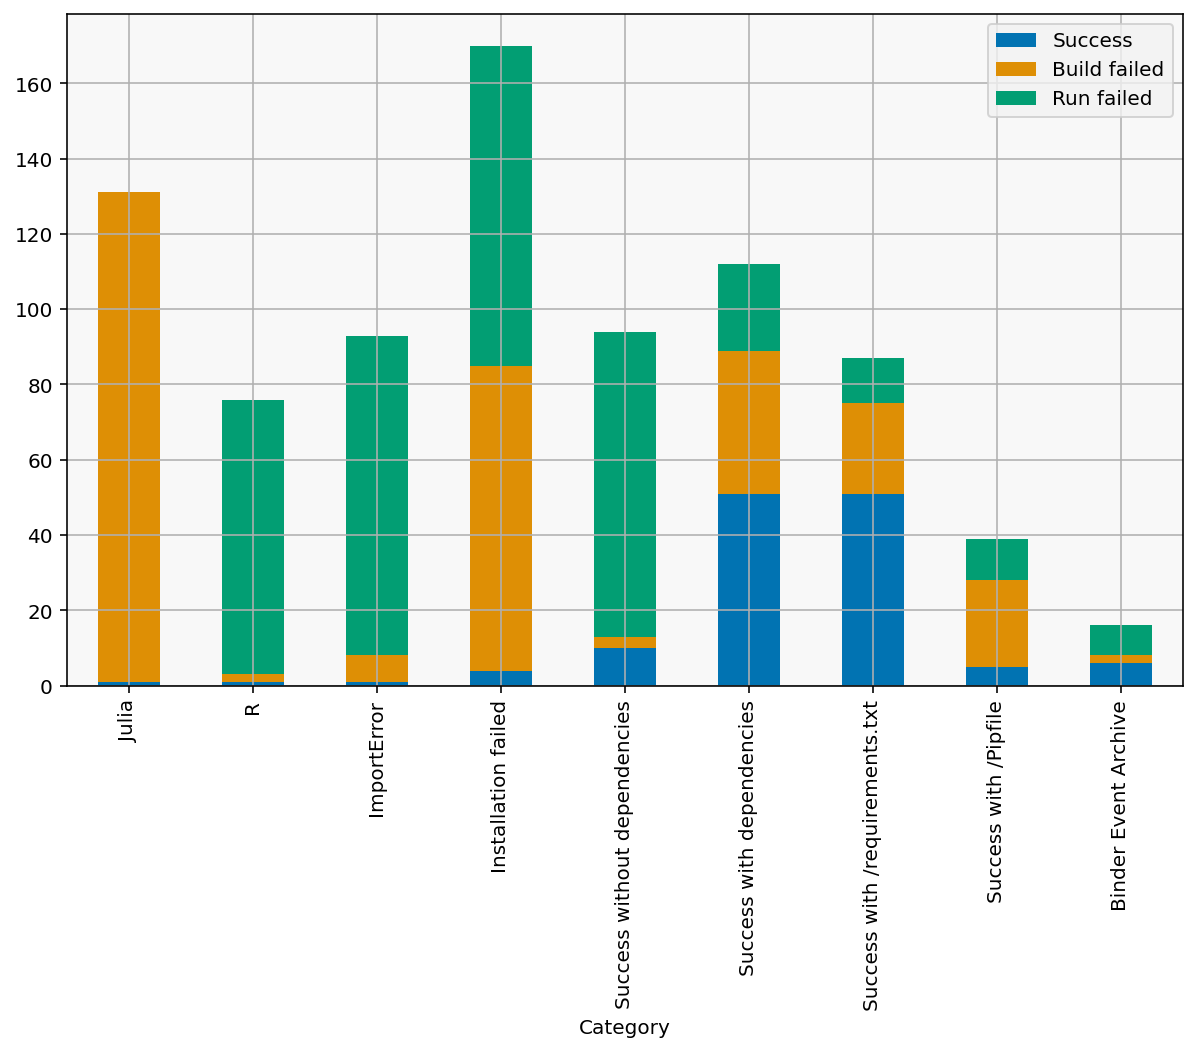

In [5]:
df.plot.bar(stacked=True, y=["Success", "Build failed", "Run failed"], color=pal)
plt.savefig("poster/fig/totals.pdf", bbox_inches="tight")

Compute rates, scaled by number of sampled repos where some notebooks were found to test

In [6]:
rates = df.copy().drop(columns=["Sampled repos", "No tests found"])
for col in rates.columns:
    rates[col] = df[col] / (df["Sampled repos"] - df["No tests found"])
rates

,Success,Build failed,Run failed,Import-related error
Category,,,,
Julia,0.007634,0.992366,0.000000,0.000000
R,0.013158,0.026316,0.960526,0.447368
ImportError,0.010753,0.075269,0.913978,0.827957
Installation failed,0.023529,0.476471,0.500000,0.411765
Success without dependencies,0.106383,0.031915,0.861702,0.744681
Success with dependencies,0.455357,0.339286,0.205357,0.044643
Success with /requirements.txt,0.586207,0.275862,0.137931,0.011494
Success with /Pipfile,0.128205,0.589744,0.282051,0.051282
Binder Event Archive,0.375000,0.125000,0.500000,0.125000


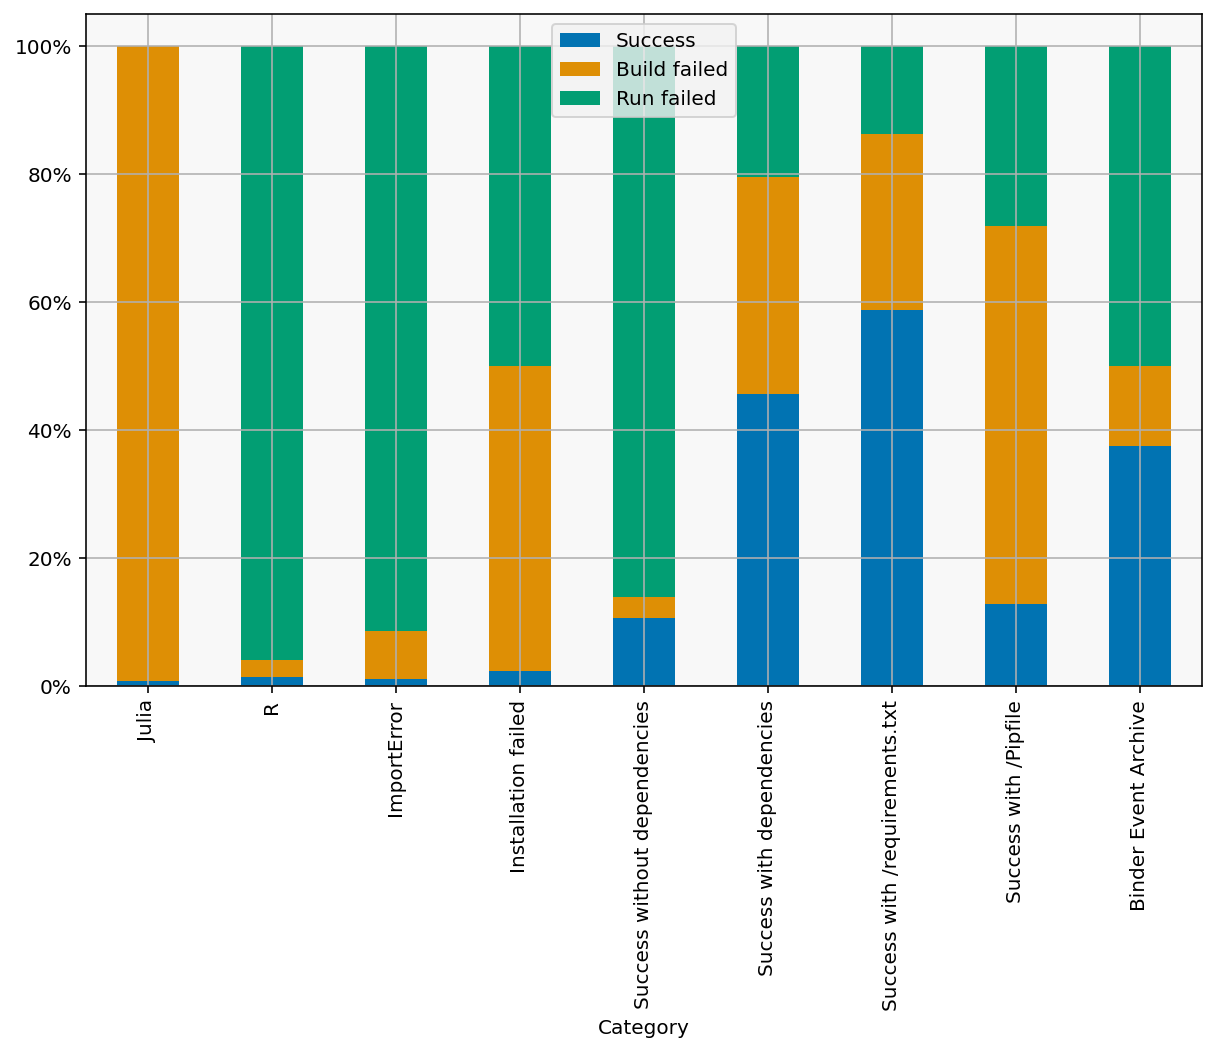

In [7]:
rates.plot.bar(stacked=True, y=["Success", "Build failed", "Run failed"], color=pal)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.savefig("poster/fig/gross-rates.pdf", bbox_inches="tight")

Separate "run failed" highlighting import-related errors
which indicate unspecified dependencies

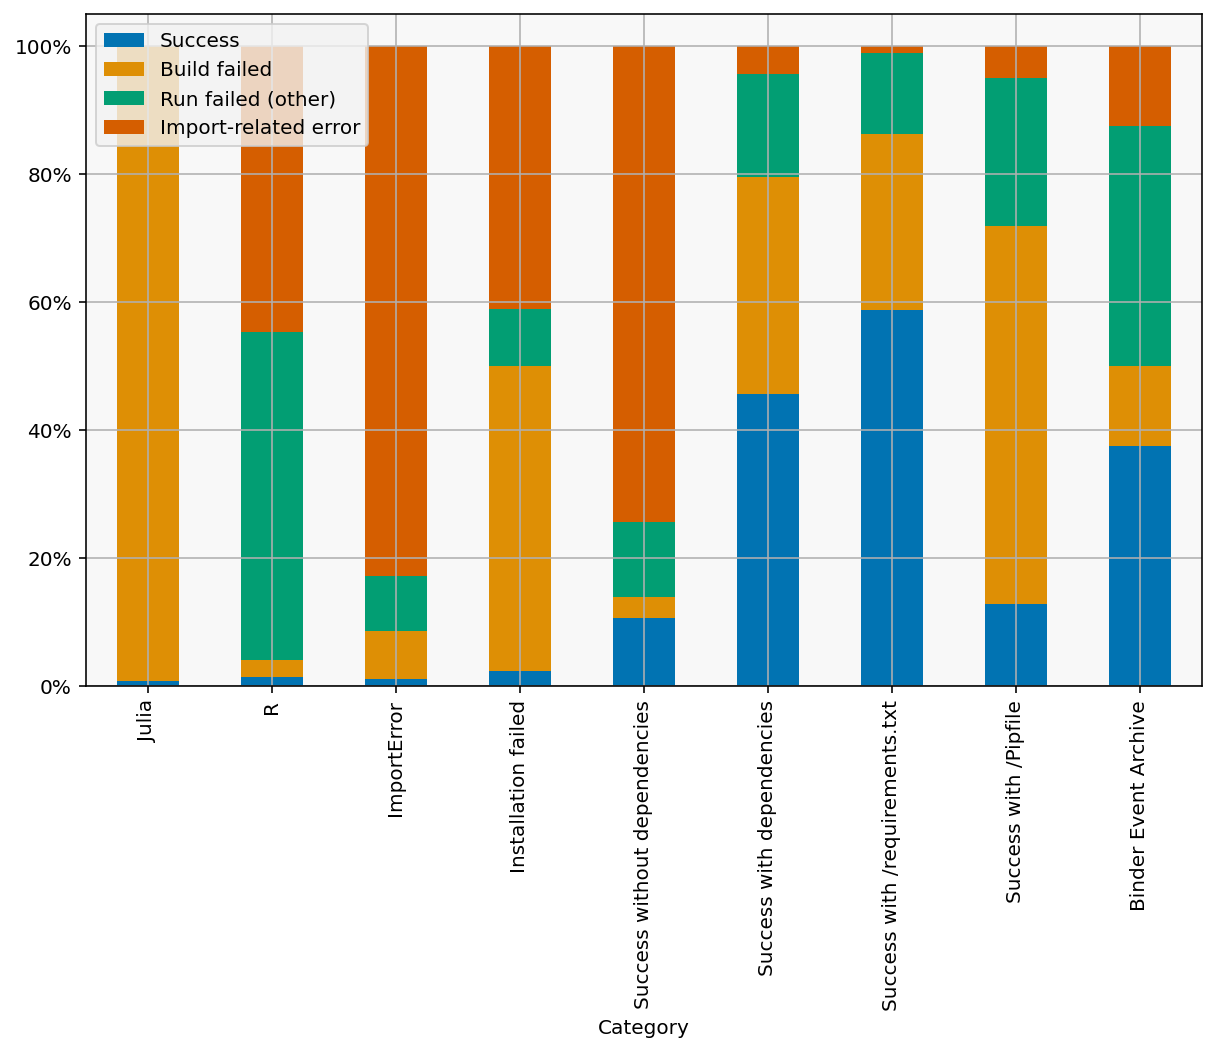

In [8]:
rates["Run failed (other)"] = rates["Run failed"] - rates["Import-related error"]
rates.plot.bar(stacked=True, y=["Success", "Build failed", "Run failed (other)", "Import-related error"], color=pal)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# also show the number of repos:
# ax.grid(False)
# ax2 = plt.gca().twinx()
# ax2.set_ylim(0, 200)
# df["Sampled repos"].plot.bar(ax=ax2, color="k", width=0.1)
# ax2.set_ylabel("Number of repos");
# ax2.grid(False)
# plt.legend(loc=0)

plt.savefig("poster/fig/rates.pdf", bbox_inches="tight")
